
John M. Shea

2/4/2021

Animated histogram showing outcomes dropping in (like balls dropped into tubes and piling up).


In [1]:
import numpy as np
import numpy.random as npr
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

%matplotlib inline

(array([ 1.,  1.,  1.,  3.,  8., 30., 17., 13., 14., 12.]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ]),
 <BarContainer object of 10 artists>)

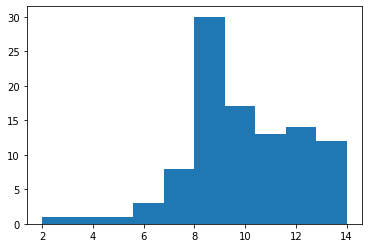

In [2]:
# First simulate rolling a fair die 100 times
random.seed(2882)
faces=['H','T']
num_sims=100
flips=20

results=[]
for sim in range(num_sims):              # The simulation loop
    coins=random.choices(faces, k=flips) # Simulate all coin flips for one experiment
    results+=[coins.count('H')]          # Add the number of 'H's in this experiment to our results list


plt.hist(results)

(array([ 1.,  0.,  1.,  1.,  3.,  8., 12., 18., 17., 13., 14.,  9.,  3.,
         0.,  0.]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5, 15.5, 16.5]),
 <BarContainer object of 15 artists>)

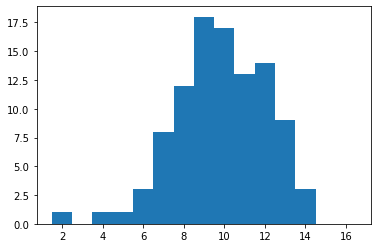

In [3]:
plt.hist(results,bins=np.arange(2,18)-0.5)

[=========================]
[*************************]

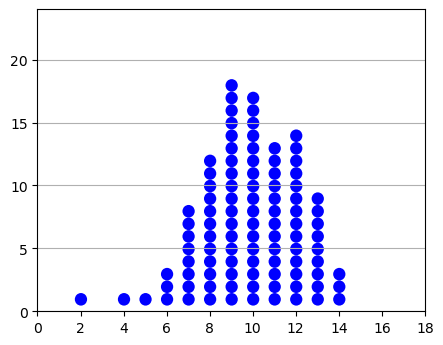

In [5]:
# Next make the animation and render it to the screen
ymax=24
ballwidth=0.57
ballheight=1

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4)

ballstart=((ymax+1)//ballheight)*ballheight

ax = plt.axes(xlim=(0, 18), ylim=(0, ymax))
plt.grid(axis='y')
patches={}
floors={}
    
done=False
def gen():
    frame=0
    while not done:
        yield frame
        frame+=1
        
#pbar = tqdm(total=len(rolls))


        
    
def init():
    patches['activePatch']=0
    #for num,var in enumerate(rolls):
    num=0
    val=results[num]
    patch = matplotlib.patches.Ellipse((val+0.02, ymax+2.95), ballwidth,
                                       ballheight, fc='b')
    ax.add_patch(patch)
    patches[num]=patch
    for val in range(1,max(results)+1):
        floors[val]=ballheight*1
        #print(num,var, patches)

    return []

def animate(i, patches,rolls):
    global done, pbar
    activePatch=patches['activePatch']
    if activePatch not in patches.keys():
        print(extra)
        return []


    x,y=patches[activePatch].get_center()
    x=int(x)
    if y<=floors[x]:
        floors[x]=floors[x]+ballheight
        patches['activePatch']=activePatch+1
        activePatch+=1
        if activePatch %4 == 0:
            print("*",end="")
        #print(patches.keys())
        #print(activePatch)

        if activePatch not in patches.keys():
            if activePatch<len(results):
                val=results[activePatch]
                patch = matplotlib.patches.Ellipse((val+0.02, ymax+2.95),
                                                   ballwidth, ballheight, fc='b')
                ax.add_patch(patch)
                patches[activePatch]=patch



            else:
                print("]",end="")
                done=True
                return []
    
    patch=patches[activePatch]
    x, y = patch.get_center()

    if y>=floors[int(x)]+2*ballheight:
        y =  y-2*ballheight
    else:
        y =  y-ballheight
    patch.set_center((x, y))
    
    return[]


print("["+"="*(len(results)//4)+"]")
print("[",end="")
    
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               #frames=int((ymax/ballheight/2))*len(G40), 
                               #frames=100,
                               frames=gen,
                               save_count=int((ymax/ballheight/2))*len(results), 
                               fargs=(patches,results),
                               interval=15,
                               blit=True,repeat=False)

#Comment this out and uncomment the anim.save() to write the GIF
HTML(anim.to_jshtml())

# anim.save('ball-histogram.gif',
#             writer=PillowWriter(fps=24, bitrate=1000), dpi=200)
plt.savefig('ball-histogram-static.png')

In [ ]:
print(results)